In [1]:
from utils import *
from PIL import Image

In [2]:
demo = Image.open("data/vamp.png")

# Alterando o brilho de uma imagem

In [3]:
def add_offset(img: Image, offset: int) -> Image:

     mode = img.mode
     img_array = np.array(img, dtype=np.int32)
     img_array += offset
     # Certificando que os limites não sejam ultrapassados
     img_array = np.minimum(255, img_array)
     img_array = np.maximum(0, img_array)

     return Image.fromarray(np.uint8(img_array), mode=mode)

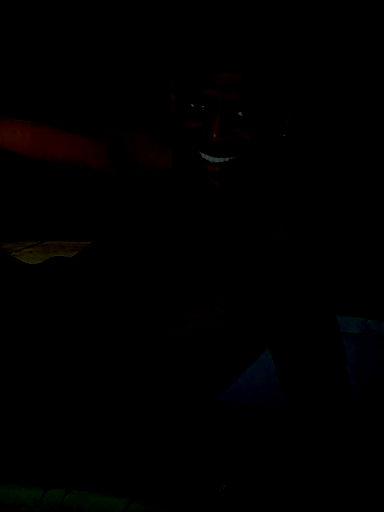

In [4]:
add_offset(demo, -180)

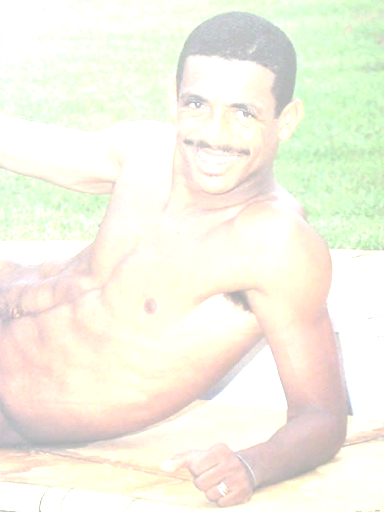

In [5]:
add_offset(demo, 150)

# Equalização de imagens

In [6]:
def equalize(img: Image) -> Image:
    
    channels = 3 if img.mode == "RGB" else 1
    
    equalized_image = np.zeros(shape=(img.size[1], img.size[0], channels))

    for channel in range(channels):

        img_channel = img.getchannel(channel)
        channel_array = np.asarray(img_channel)
        channel_histogram = histogram_from_grayscale(img_channel)

        channel_cdf = channel_histogram.cumsum()

        min_cdf = channel_cdf[channel_cdf > 0][0]
        max_cdf = channel_cdf.max()

        equalized_histogram = np.floor(
            255 * (channel_cdf - min_cdf) / (max_cdf - min_cdf)
        )

        equalized_histogram = np.maximum(equalized_histogram, 0)

        equalized_image[:,:,channel] = equalized_histogram[channel_array]

    return Image.fromarray(np.uint8(equalized_image.squeeze()), mode=img.mode)




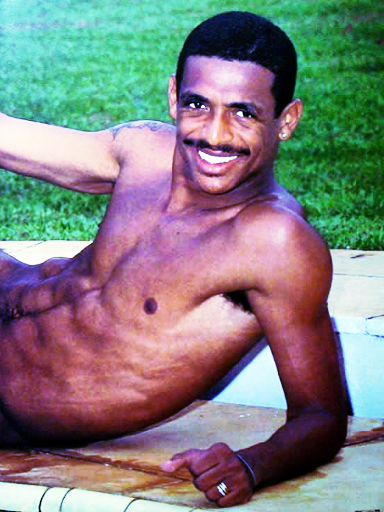

In [7]:
equalized_demo = equalize(demo)
equalized_demo

# Comparando histogramas original e da imagem com o histograma equalizado

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

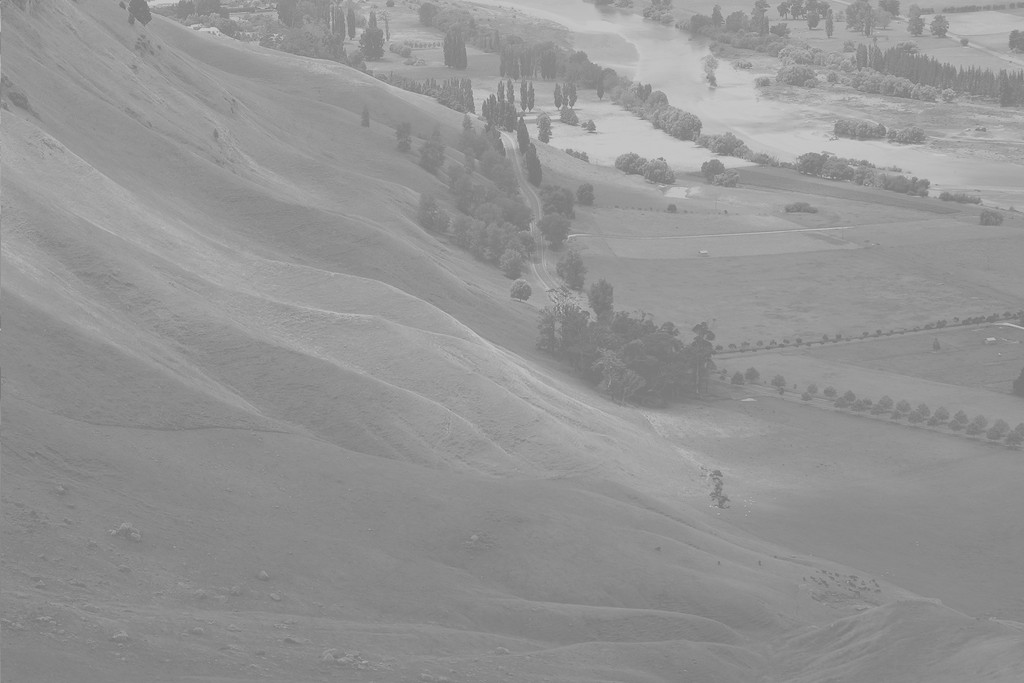

In [9]:
demo = Image.open("data/wiki_demo.jpg").convert("L")
demo

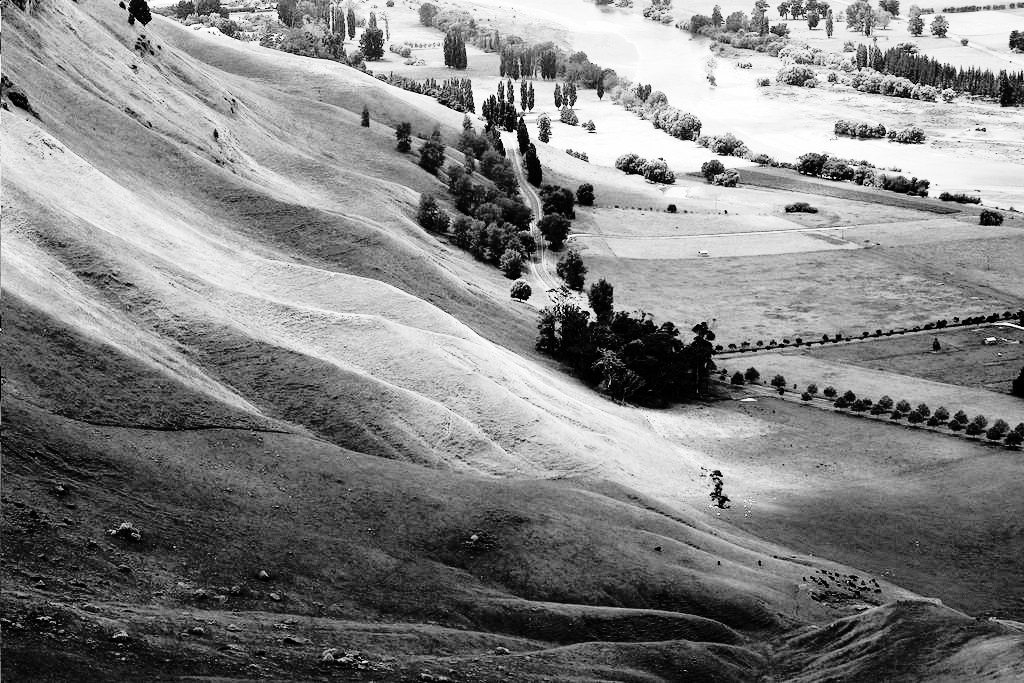

In [10]:
equalized_demo = equalize(demo)
equalized_demo

In [11]:
histogram_dict = {
    "original": histogram_from_grayscale(demo),
    "equalized": histogram_from_grayscale(equalized_demo),
}

In [12]:
hist_df = pd.DataFrame.from_dict(histogram_dict)

<AxesSubplot:title={'center':'Equalizado'}>

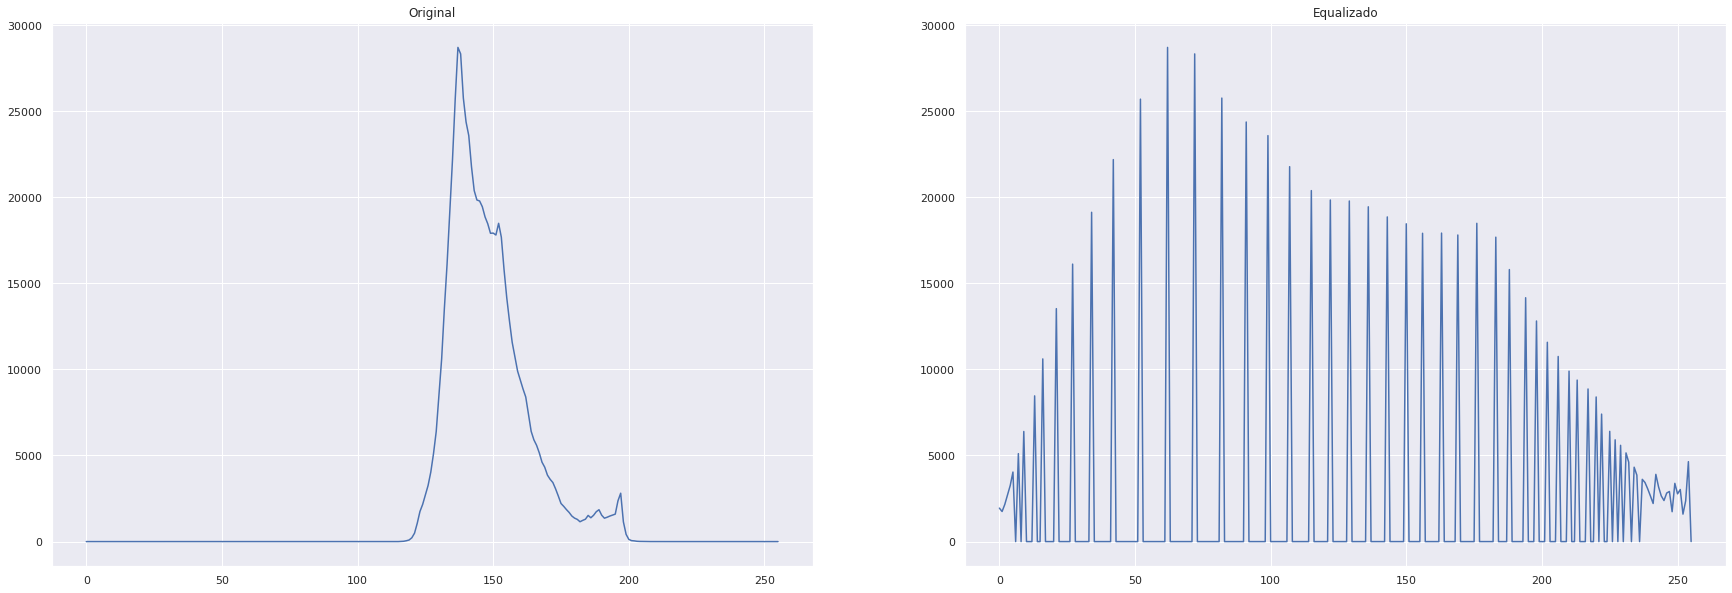

In [13]:
sns.set(rc={"figure.figsize": (30, 10)})
fig, axes = plt.subplots(nrows=1, ncols=2)

hist_df["original"].plot(ax=axes[0], title="Original")
hist_df["equalized"].plot(ax=axes[1], title="Equalizado")